## Credit Card Fraud Detection
### Aaron Gabriel, Ramon Gonzalez & Jimmy Hwang

---

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

from dmba import gainsChart, liftChart
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary

---

### Load Dataset

In [2]:
df = pd.read_csv("/Users/aarongabriel/Desktop/MDM/Masters/ADS 505 Applied Data Science for Business/FINAL PROJECT/DATA/creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
df.shape

(568630, 31)

In [4]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

---

### EDA

In [5]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.323544e-16,-3.518788e-17,-2.879008e-17,7.197521e-18,-3.838678e-17,-3.198898e-17,2.069287e-17,9.116859e-17,...,4.758361e-17,5.398140e-18,5.395017e-18,-1.999311e-18,-3.028957e-17,-7.547400e-18,-3.598760e-17,2.499139e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [6]:
# Confirming no missing data
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Confirming class is already balanced
df["Class"].value_counts(normalize=True)

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

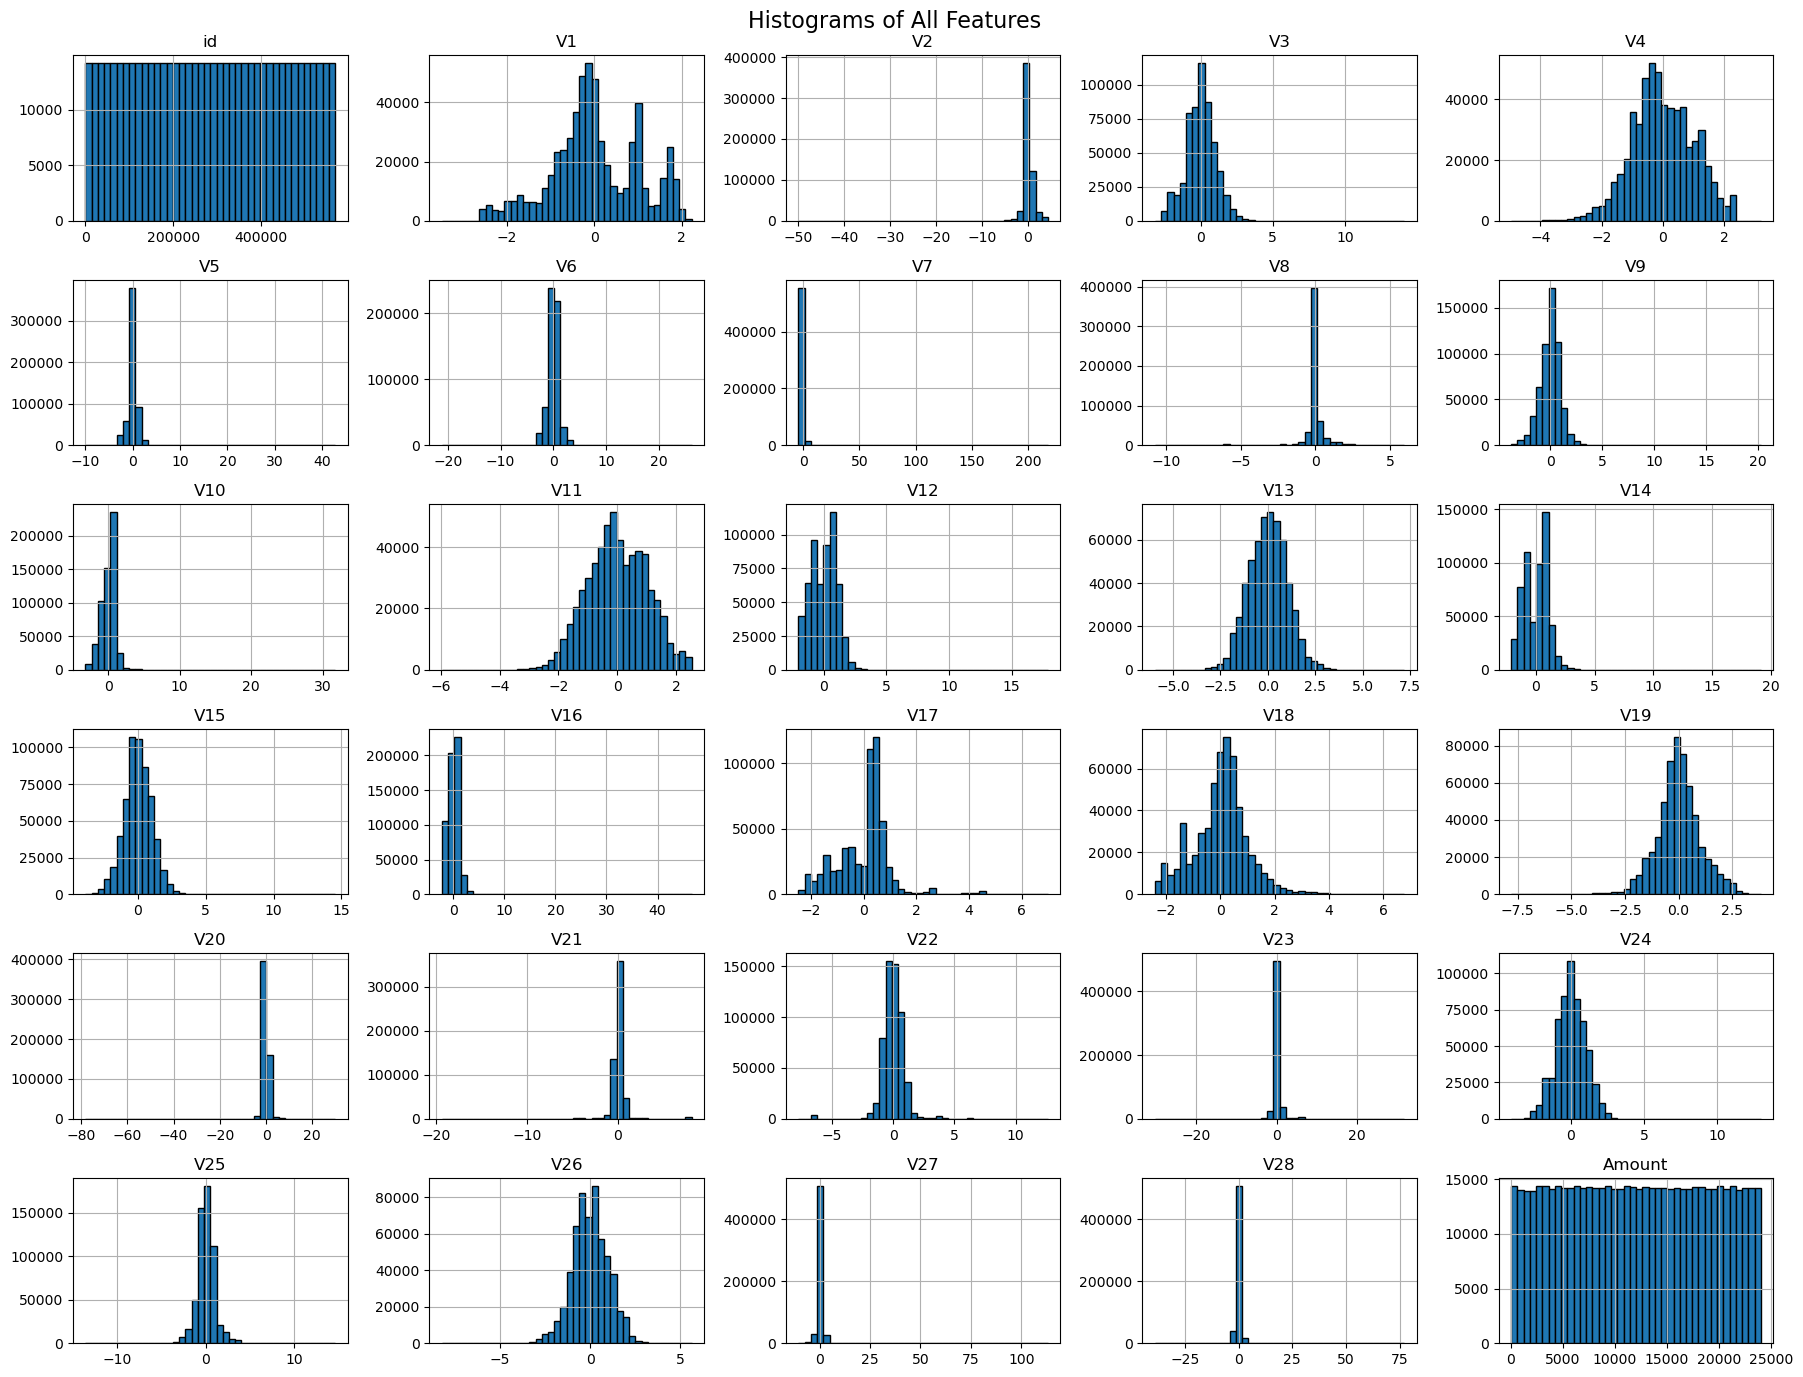

In [8]:
# Histogram of all features
df.drop(columns=["Class"]).hist(figsize=(18, 14), bins=40, edgecolor="black")
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout()
plt.show()

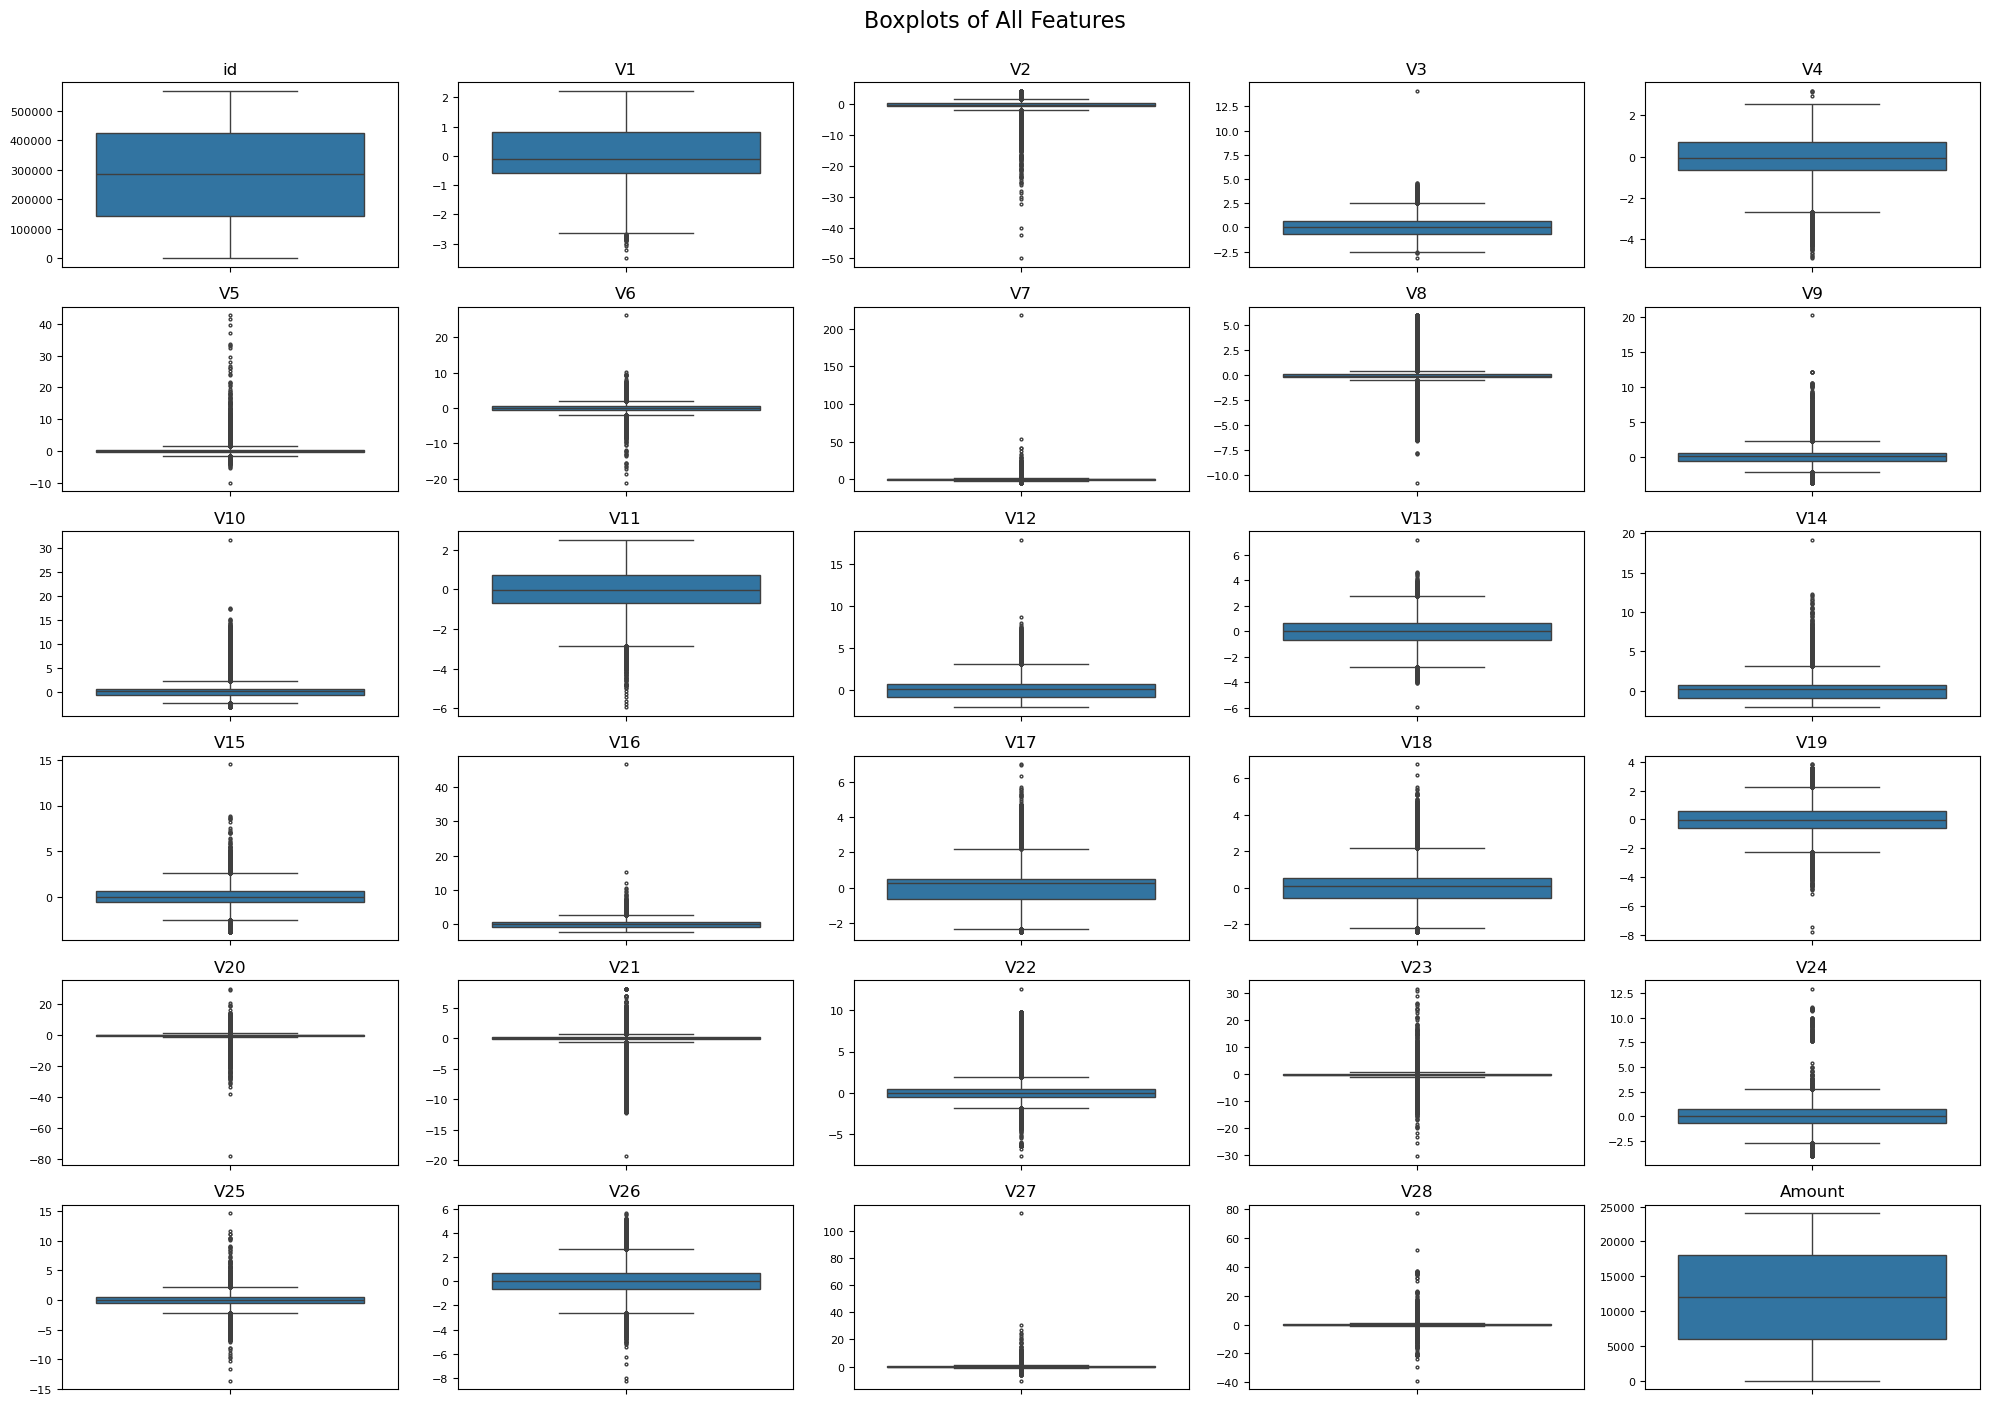

In [9]:
# Boxplot of all features
num_cols = [c for c in df.columns if c != "Class"]

# Grid setup
n_cols = 5
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 14))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i], fliersize=2)
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis="both", labelsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots of All Features", fontsize=16, y=1)
plt.tight_layout()
plt.show()

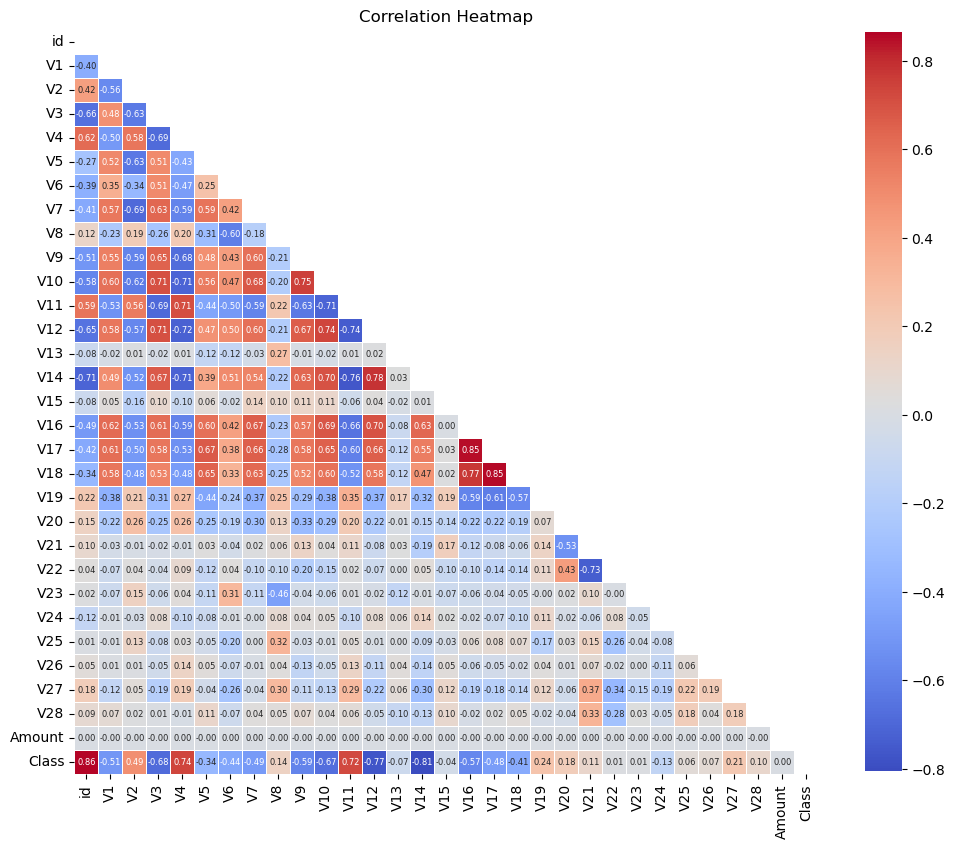

In [10]:
# Correlation
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 12))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 6},
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap", fontsize=12)
plt.show()

---

### Pre-Processing

In [11]:
# Create new dataset with removal of "id"
df_clean = df.drop(columns=["id"]).copy()

# Variance inflation score
vif_data = pd.DataFrame()
vif_data["Feature"] = df_clean.columns
vif_data["VIF"] = [variance_inflation_factor(df_clean.values, i)
                          for i in range(len(df_clean.columns))]
vif_data

,Feature,VIF
0,V1,2.131494
1,V2,3.043761
2,V3,3.086798
3,V4,3.176413
4,V5,2.895349
5,V6,2.513297
6,V7,3.061452
7,V8,2.726756
8,V9,2.976261
9,V10,3.960197


In [12]:
# Highly correlated features
df_clean[["V9", "V10", "V11", "V12", "V14", "V16", "V17", "V18", "V21", "V22", "Class"]].corr()

,V9,V10,V11,V12,V14,V16,V17,V18,V21,V22,Class
V9,1.000000,0.748487,-0.633556,0.667266,0.633212,0.573957,0.581604,0.522720,0.131001,-0.204723,-0.585522
V10,0.748487,1.000000,-0.713066,0.736783,0.698939,0.686602,0.649149,0.596702,0.037426,-0.150957,-0.673665
V11,-0.633556,-0.713066,1.000000,-0.744642,-0.762322,-0.655081,-0.601924,-0.519721,0.111608,0.022153,0.724278
V12,0.667266,0.736783,-0.744642,1.000000,0.783878,0.698490,0.658739,0.579374,-0.080394,-0.072096,-0.768579
V14,0.633212,0.698939,-0.762322,0.783878,1.000000,0.630516,0.552428,0.469393,-0.189902,0.052023,-0.805669
V16,0.573957,0.686602,-0.655081,0.698490,0.630516,1.000000,0.848095,0.767992,-0.117591,-0.101847,-0.573511
V17,0.581604,0.649149,-0.601924,0.658739,0.552428,0.848095,1.000000,0.851366,-0.079348,-0.144637,-0.476377
V18,0.522720,0.596702,-0.519721,0.579374,0.469393,0.767992,0.851366,1.000000,-0.060862,-0.135994,-0.410091
V21,0.131001,0.037426,0.111608,-0.080394,-0.189902,-0.117591,-0.079348,-0.060862,1.000000,-0.734653,0.109640
V22,-0.204723,-0.150957,0.022153,-0.072096,0.052023,-0.101847,-0.144637,-0.135994,-0.734653,1.000000,0.014098


In [13]:
# Dropping features
df_clean = df_clean.drop(columns=["V9", "V10", "V12", "V17", "V18", "V21", "V22"])
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V11,V13,...,V19,V20,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,-0.987020,-0.941386,...,0.124270,0.091202,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.140107,0.574074,...,-0.340687,-0.233984,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.272985,0.805173,...,-2.366079,0.361652,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.752581,0.592994,...,-1.345060,-0.378223,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,-1.203171,1.439310,...,0.445317,0.247237,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


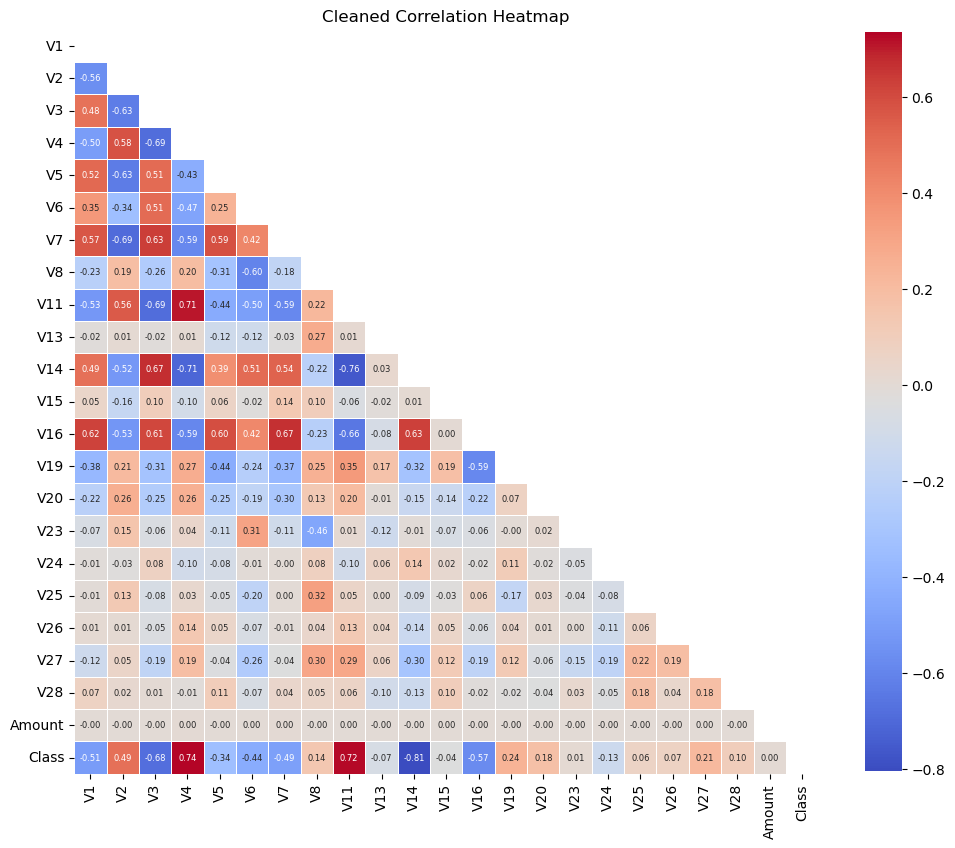

In [14]:
# Cleaned correlation
corr_clean = df_clean.corr()
mask_clean = np.triu(np.ones_like(corr_clean, dtype=bool))
plt.figure(figsize=(12, 12))
sns.heatmap(
    corr_clean,
    mask=mask_clean,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 6},
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Cleaned Correlation Heatmap", fontsize=12)
plt.show()

In [15]:
# Variance inflation score
vif_clean_data = pd.DataFrame()
vif_clean_data["Feature"] = df_clean.columns
vif_clean_data["VIF"] = [variance_inflation_factor(df_clean.values, i)
                          for i in range(len(df_clean.columns))]
vif_clean_data

,Feature,VIF
0,V1,2.015614
1,V2,2.916664
2,V3,2.950657
3,V4,2.974326
4,V5,2.534029
5,V6,2.470637
6,V7,2.896070
7,V8,2.679570
8,V11,3.295659
9,V13,1.145966


---

### Modeling

In [16]:
# Separate target and predictors
X = df_clean.drop(columns=["Class"])
y = df_clean["Class"]

# Partition the data into training (60%) and testing (40%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

#### Logistic Regression

In [17]:
# Logistic regression
logit = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    C=1.0,
    max_iter=10000,
    n_jobs=-1,
    random_state=1
)

logit.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=-1, random_state=1)

In [18]:
y_prob = logit.predict_proba(X_test)[:, 1]
y_pred = logit.predict(X_test)
print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))
classificationSummary(y_test, y_pred)

AUC: 0.9901897944457023
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    113792
           1       0.97      0.93      0.95    113660

    accuracy                           0.95    227452
   macro avg       0.96      0.95      0.95    227452
weighted avg       0.96      0.95      0.95    227452

Confusion Matrix (Accuracy 0.9550)

       Prediction
Actual      0      1
     0 111050   2742
     1   7494 106166


In [19]:
# Logistic regression coefficients
print("intercept ", logit.intercept_[0])
print(pd.DataFrame({"coeff": logit.coef_[0]},
                   index=X.columns).transpose())
print('\nAIC', AIC_score(y_test, logit.predict(X_test),
                       df = len(X_train.columns) + 1))

intercept  2.466583406987384
             V1        V2        V3        V4        V5        V6        V7  \
coeff -0.809439  0.340262 -1.052307  3.178279 -0.190036 -0.610634 -0.192765   

             V8       V11       V13  ...       V16       V19       V20  \
coeff -1.793694  0.972186 -0.198428  ... -0.753832 -0.329365  0.088058   

            V23       V24      V25       V26       V27       V28        Amount  
coeff -0.192631 -0.211614  0.08532  0.043635  0.057836  0.051745 -2.198211e-07  

[1 rows x 22 columns]

AIC -59806.27638905228


#### Decision Tree

In [20]:
# Decision Tree Model

dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth = 12,
    min_samples_leaf=50,
    random_state = 1
)
dt.fit(X_train, y_train)

y_prob = dt.predict_proba(X_test)[:, 1]
y_pred = dt.predict(X_test)

print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))
classificationSummary(y_test, y_pred)

AUC: 0.9984966263125258
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    113792
           1       0.99      0.98      0.99    113660

    accuracy                           0.99    227452
   macro avg       0.99      0.99      0.99    227452
weighted avg       0.99      0.99      0.99    227452

Confusion Matrix (Accuracy 0.9855)

       Prediction
Actual      0      1
     0 112242   1550
     1   1742 111918


#### Random Forest

In [21]:
# Random Forest Model

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth = None,
    min_samples_leaf = 20,
    n_jobs=-1,
    random_state=1
)
rf.fit(X_train, y_train)

y_prob = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)

print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))
classificationSummary(y_test, y_pred)

AUC: 0.9999743831158542
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113792
           1       1.00      1.00      1.00    113660

    accuracy                           1.00    227452
   macro avg       1.00      1.00      1.00    227452
weighted avg       1.00      1.00      1.00    227452

Confusion Matrix (Accuracy 0.9991)

       Prediction
Actual      0      1
     0 113668    124
     1     70 113590


/var/folders/yv/_r_084jj03l2sw6gn8ryhjpw0000gn/T/ipykernel_65091/3164512959.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[:15], y=importances.index[:15], palette="Blues_r")


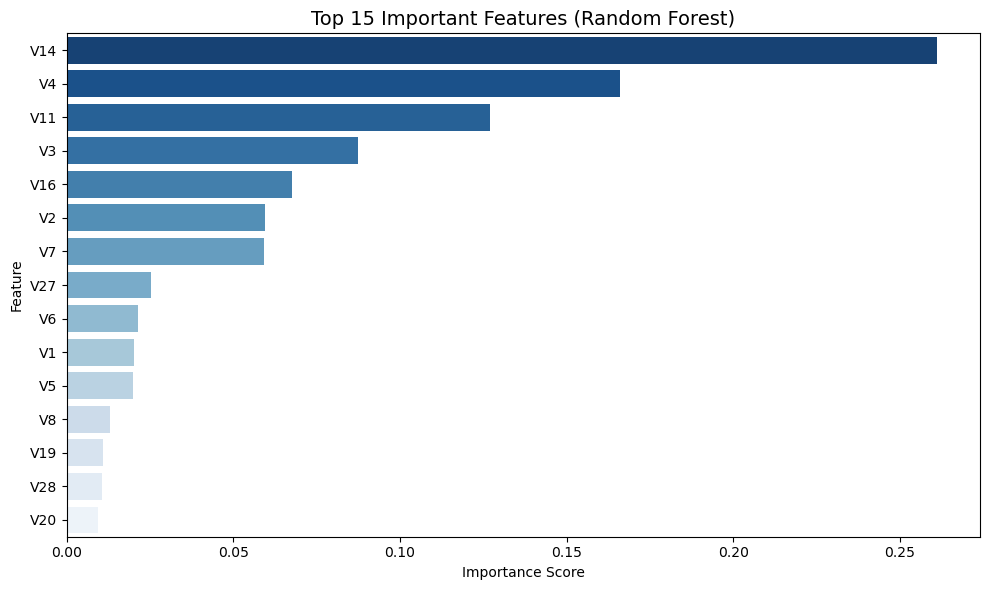

In [22]:
# feature importances derived from Random Forest Model

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances[:15], y=importances.index[:15], palette="Blues_r")
plt.title("Top 15 Important Features (Random Forest)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

####  Feature Importance Analysis (Random Forest)

Feature importance was included in this notebook to better understand which variables most strongly influence the model’s predictions. In Random Forest models, importance scores are calculated based on how much each feature reduces impurity across all decision trees in the ensemble. This helps identify which predictors contribute most to the model’s decision-making process.

The bar chart above highlights the top 15 features ranked by importance. Features such as **V14**, **V4**, and **V11** emerge as the most influential, indicating that they play a significant role in differentiating between the two classes in the dataset. By examining these drivers, we can gain interpretability and potentially inform future **feature selection**, **model simplification**, or **domain-level insights** about what underlying patterns drive classification outcomes.

#### Neural Network

In [23]:
# Neural Network Model

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

mlp = Pipeline ([
    ("scaler", StandardScaler(with_mean=False)),
    ("clf", MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        max_iter=100,
        early_stopping=True,
        n_iter_no_change=5,
        random_state=1
    ))
]
)

mlp.fit(X_train, y_train)

# access underlying estimator for probab
y_prob = mlp.predict_proba(X_test)[:, 1]
y_pred = mlp.predict(X_test)

print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))
classificationSummary(y_test, y_pred)

AUC: 0.9999598769831016
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113792
           1       1.00      1.00      1.00    113660

    accuracy                           1.00    227452
   macro avg       1.00      1.00      1.00    227452
weighted avg       1.00      1.00      1.00    227452

Confusion Matrix (Accuracy 0.9995)

       Prediction
Actual      0      1
     0 113683    109
     1      0 113660


#### K-Neighbors Classifier

In [25]:
# K-Neighbors Model

knn = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("clf", KNeighborsClassifier(n_neighbors=11, weights="distance", n_jobs=-1))
])
knn.fit(X_train, y_train)

y_prob = knn.predict_proba(X_test)[:, 1]
y_pred = knn.predict(X_test)

print("K-Neighbors Classifier Model:")
print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))
classificationSummary(y_test, y_pred)

K-Neighbors Classifier Model:
AUC: 0.9993206023945669
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    113792
           1       0.99      1.00      1.00    113660

    accuracy                           1.00    227452
   macro avg       1.00      1.00      1.00    227452
weighted avg       1.00      1.00      1.00    227452

Confusion Matrix (Accuracy 0.9952)

       Prediction
Actual      0      1
     0 112709   1083
     1      1 113659


---

### Model Evaluation

---

### Business Summary